Champagne Sale Forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [ ]:
# Load your time series data
df=pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

df.columns=["Month","Sales"]
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)


In [3]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


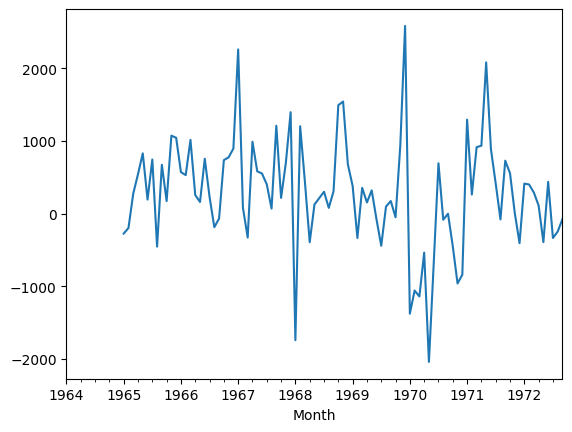

In [4]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df['Seasonal First Difference'].plot()

## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())


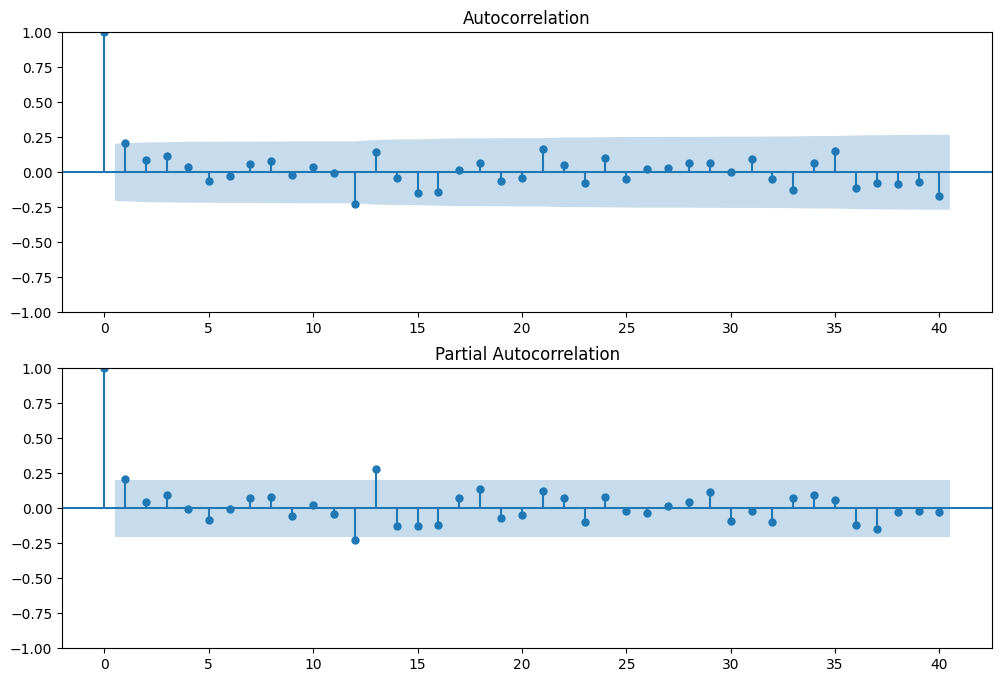

In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

ARIMA - RMSE: 3018.73, MAE: 2368.79, MAPE: nan%
SARIMA - RMSE: 611.28, MAE: 468.66, MAPE: nan%
Exponential Smoothing - RMSE: 1073.36, MAE: 909.71, MAPE: nan%

Model Comparison:
Model               RMSE      MAE       MAPE      
ARIMA               3018.73   2368.79   nan%
SARIMA              611.28   468.66   nan%
Exponential Smoothing1073.36   909.71   nan%


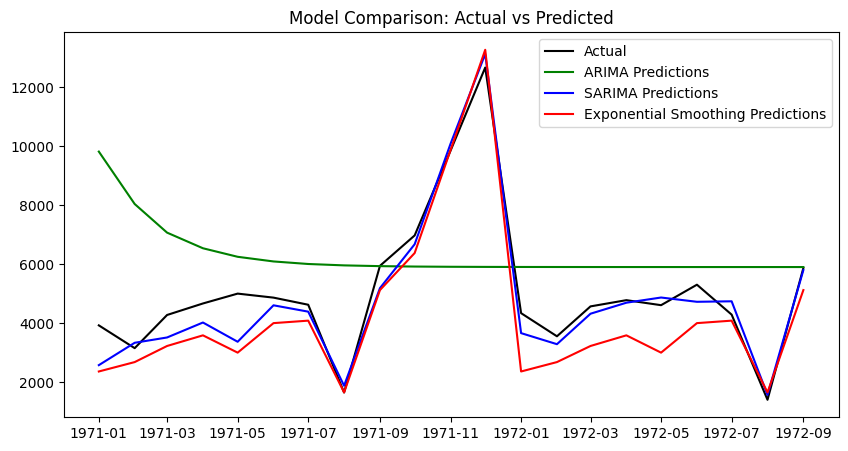

In [7]:

# Load your time series data
df=pd.read_csv('/content/perrin-freres-monthly-champagne- (1).csv')
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

df.columns=["Month","Sales"]
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)


# Split data into training (80%) and testing (20%) sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


# Fit ARIMA model
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

# Make ARIMA predictions
arima_preds = arima_fit.predict(start=len(train), end=len(df)-1, dynamic=False)


# Fit SARIMA model
sarima_model =sm.tsa.statespace.SARIMAX(df['Sales'],seasonal_order=(1,1,0,12))
sarima_fit = sarima_model.fit()

# Make SARIMA predictions
sarima_preds = sarima_fit.predict(start=len(train), end=len(df)-1, dynamic=False)

# Fit Exponential Smoothing model
exp_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
exp_fit = exp_model.fit()
exp_preds = exp_fit.forecast(len(test))

# Evaluation metrics function
def evaluate(actual, predicted, model_name):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
    return rmse, mae, mape

# Evaluate both models
rmse_arima, mae_arima, mape_arima = evaluate(test, arima_preds, "ARIMA")
rmse_sarima, mae_sarima, mape_sarima = evaluate(test, sarima_preds, "SARIMA")
rmse_exp, mae_exp, mape_exp = evaluate(test, exp_preds, "Exponential Smoothing")

# Compare models
print("\nModel Comparison:")
print(f"{'Model':<20}{'RMSE':<10}{'MAE':<10}{'MAPE':<10}")
print(f"{'ARIMA':<20}{rmse_arima:.2f}   {mae_arima:.2f}   {mape_arima:.2f}%")
print(f"{'SARIMA':<20}{rmse_sarima:.2f}   {mae_sarima:.2f}   {mape_sarima:.2f}%")
print(f"{'Exponential Smoothing':<20}{rmse_exp:.2f}   {mae_exp:.2f}   {mape_exp:.2f}%")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Actual", color='black')
plt.plot(test.index, arima_preds, label="ARIMA Predictions", color='green')
plt.plot(test.index, sarima_preds, label="SARIMA Predictions", color='blue')
plt.plot(test.index, exp_preds, label="Exponential Smoothing Predictions", color='red')
plt.legend()
plt.title("Model Comparison: Actual vs Predicted")
plt.show()


<ipython-input-8-ddb4adc35956>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


Text(0.5, 1.0, 'SARIMAX Future Forecast')

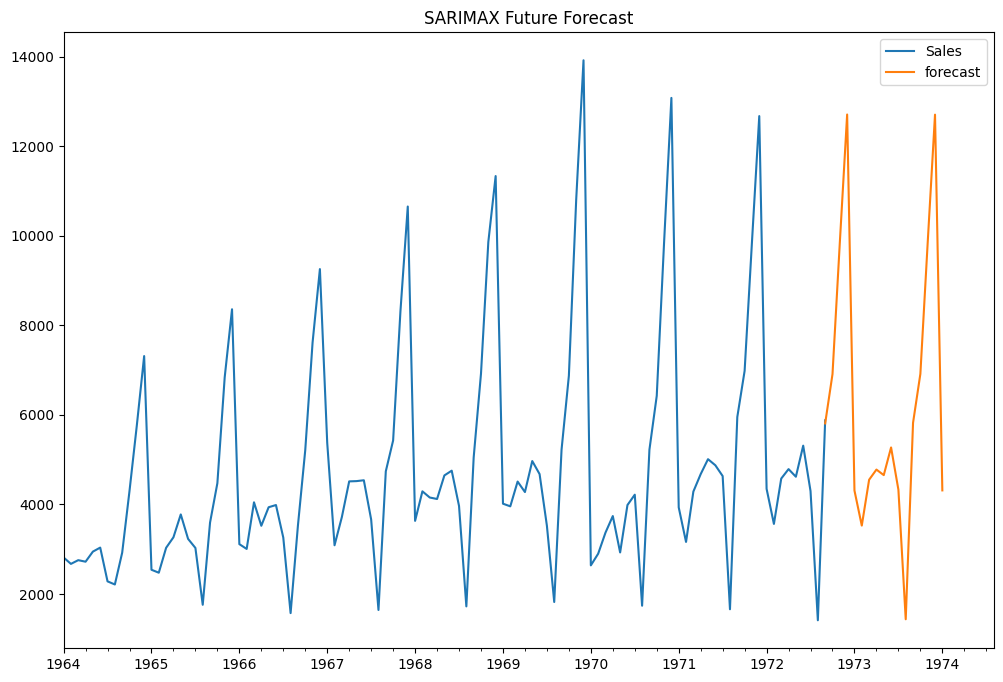

In [8]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = sarima_fit.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('SARIMAX Future Forecast')

<ipython-input-9-e7547197bdd9>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


Text(0.5, 1.0, 'ARIMA Future Forecast')

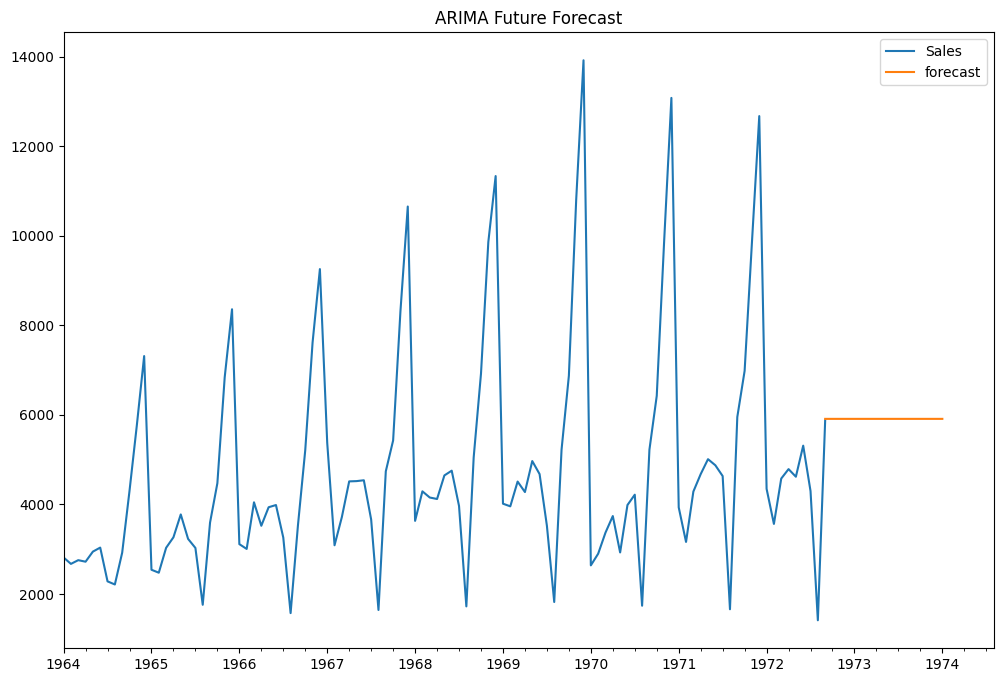

In [9]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = arima_fit.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('ARIMA Future Forecast')

<ipython-input-10-39dd96fe523f>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


Text(0.5, 1.0, 'Triple Exponential Future Forecast')

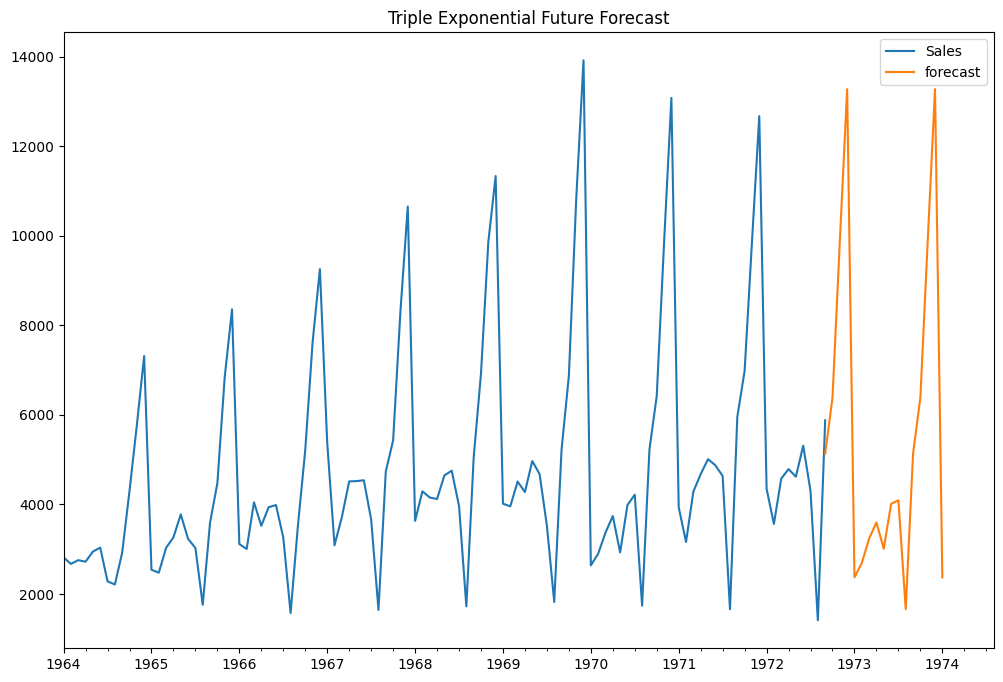

In [10]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] =exp_fit.predict(start = 104, end = 120)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.title('Triple Exponential Future Forecast')